## Variable profiling and checking relationships between variables:


### Importing stuff

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('cleaned_combined_airbnb.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667


In [4]:
df.columns

Index(['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'listing_url', 'name', 'latitude', 'longitude',
       'property_type', 'room_type', 'accomodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'host_id', 'host_name', 'host_since',
       'host_location', 'total_reviews', 'days_since_review',
       'comment_length'],
      dtype='object')

# Feature Engineering
There are a lot of features you can create to make your model perform better. 
- Take this part as a 'guidance' rather than a 'sure/gauranteed' way of doing feature engineering. 
- If you have any ideas that i have not done/covered. Feel free to have a go at it!  
- Who knows, your feature might overperform the features here.

#### We can create a feature called 'host_since' as we know when the host joined the platform, we can use that information and represent the same as a number.

In [5]:
df['host_since']

0       2010-09-14
1       2010-09-14
2       2010-09-14
3       2010-09-14
4       2011-05-14
           ...    
1694    2021-11-23
1695    2017-12-29
1696    2015-10-11
1697    2020-11-30
1698    2021-12-24
Name: host_since, Length: 1699, dtype: object

In [6]:
df['host_since']= pd.to_datetime(df['host_since'])

In [7]:
df['host_since']

0      2010-09-14
1      2010-09-14
2      2010-09-14
3      2010-09-14
4      2011-05-14
          ...    
1694   2021-11-23
1695   2017-12-29
1696   2015-10-11
1697   2020-11-30
1698   2021-12-24
Name: host_since, Length: 1699, dtype: datetime64[ns]

In [8]:
basedate = pd.Timestamp('2022-04-18')
days_since_joined = abs(df['host_since'] - basedate).dt.days
days_since_joined

0       4234
1       4234
2       4234
3       4234
4       3992
        ... 
1694     146
1695    1571
1696    2381
1697     504
1698     115
Name: host_since, Length: 1699, dtype: int64

In [9]:
df['days_since_joined'] = days_since_joined

<AxesSubplot:xlabel='days_since_joined', ylabel='Density'>

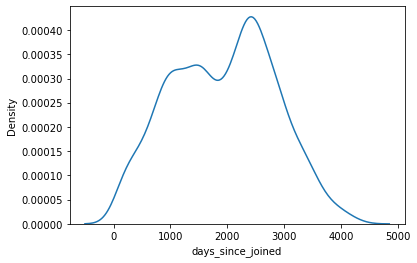

In [10]:
sns.kdeplot(df['days_since_joined'])

#### Let's also see, if we can make something of the host location column, the least we can do is to extract the country from that column

In [11]:
for i in df['host_location'].unique():
    print(i)

Antwerp, Flanders, Belgium
Kapellen, Flanders, Belgium
Antwerp, Vlaams Gewest, Belgium
Lier, Vlaanderen, Belgium
Antwerpen, Vlaams Gewest, Belgium
Antwerpen, Flemish Region, Belgium
Edegem, Flanders, Belgium
Herentals, Flanders, Belgium
Aartselaar, Flanders, Belgium
Ghent, Flanders, Belgium
Antwerpen, Flanders, Belgium
Zoersel, Flanders, Belgium
Hove, Flanders, Belgium
Middelburg, Zeeland, Netherlands
BE
Belgium
Wommelgem, Flanders, Belgium
Brasschaat, Flanders, Belgium
Antwerpen, Vlaanderen, Belgium
Netherlands
Deurne, Vlaams Gewest, Belgium
Arendonk, Flanders, Belgium
Greater London, England, United Kingdom
's-Hertogenbosch, North Brabant, Netherlands
Stekene, Flanders, Belgium
Amsterdam, North Holland, The Netherlands
Bergen, Noord-Holland, Netherlands
 Zeeland, Netherlands
Wuustwezel, Flanders, Belgium
Wijnegem, Flanders, Belgium
Nazareth, Flanders, Belgium
Tessenderlo, Flanders, Belgium
New York, New York, United States
Vorselaar, Flanders, Belgium
Kruibeke, Flanders, Belgium
Heve

In [12]:
def return_country(x):
    try:
        text_list = x.split(',')
        if len(text_list) == 3:
            return text_list[2]
        else:
            return text_list[0]
    except:
        return None
        
def return_state(x):
    try:        
        text_list = x.split(',')
        if len(text_list) == 3:
            return text_list[1]
        else:
            return None
    except:
        return None
    
def return_city(x):
    try:        
        text_list = x.split(',')
        if len(text_list) == 3:
            return text_list[0]
        else:
            return None
    except:
        return None

In [13]:
df['host_location_country'] = df['host_location'].apply(return_country)
df['host_location_state'] = df['host_location'].apply(return_state)
df['host_location_city'] = df['host_location'].apply(return_city)

In [14]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,host_location_state,host_location_city
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium,Flanders,Antwerp
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium,Flanders,Antwerp
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium,Flanders,Antwerp
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium,Flanders,Antwerp
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium,Flanders,Kapellen


<AxesSubplot:>

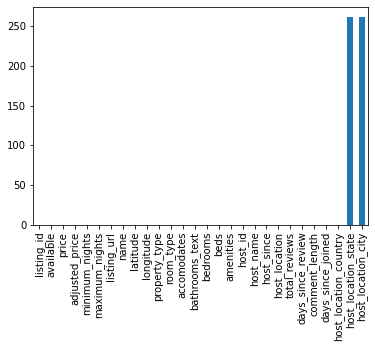

In [15]:
df.isna().sum().plot(kind='bar')

Okay, so the host state and city have a lot of null values.
- This again gives us a dilema
- Do we remove those rows
- Or do we just drop the column

If i remove the rows, that will be 250 rows removed out of 1700, that is about 14% of the data.
- If you wish to, you can do this. (perfectly valid approach)
- But here, i am not going to do that, i am going to drop the column.

In [16]:
df.columns

Index(['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'listing_url', 'name', 'latitude', 'longitude',
       'property_type', 'room_type', 'accomodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'host_id', 'host_name', 'host_since',
       'host_location', 'total_reviews', 'days_since_review', 'comment_length',
       'days_since_joined', 'host_location_country', 'host_location_state',
       'host_location_city'],
      dtype='object')

In [17]:
df.drop(['host_location_state','host_location_city'], axis=1, inplace=True)

So, i have dropped those 2 columns, let's see how the new feature host_location_country is distributed

In [18]:
df.groupby('host_location_country').count()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined
host_location_country,,,,,,,,,,,,,,,,,,,,,
Belgium,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364,...,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
Estonia,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
France,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Germany,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
India,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Italy,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Netherlands,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
North Macedonia,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Norway,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


I see a lot of countries being repeated, i should clean this out.

In [19]:
df['host_location_country'].nunique()

40

In [20]:
df['host_location_country'].unique()

array([' Belgium', ' Netherlands', 'BE', 'Belgium', 'Netherlands',
       ' United Kingdom', ' The Netherlands', ' Zeeland',
       ' United States', ' Norway', ' Switzerland', ' Spain', ' Portugal',
       'Antwerpen Belgium  / Chiavenna Italy', ' France', 'NL', 'Skopje',
       'Styria', ' Italy', 'GB', ' India', 'TR', 'DK', 'Greece', 'Moscow',
       'Airbnb Studio Minerva', 'Flanders', ' North Macedonia', 'US',
       'France', ' Germany', 'IT', ' Estonia', 'EE', 'Kyiv', 'Floriana',
       'ES', 'FR', 'België', 'Germany'], dtype=object)

In [21]:
country_dic = {
    ' The Netherlands': 'Netherlands',
    'Zeeland': 'New Zealand',
    ' Zeeland': 'New Zealand',
    ' Netherlands':'Netherlands',
    ' The Netherlands': 'Netherlands',
    'BE': 'Belgium',
    ' Belgium': 'Belgium',
    'Belgium': 'Belgium',
    'België': 'Belgium',
    'DK': 'Denmark',
    'EE': 'Estonia',
    ' Estonia':'Estonia',
    'ES': 'Spain',
    'FR' : 'France',
    ' France': 'France',
    ' Italy': 'Italy',
    'GB': 'United Kingdom',
    ' Germany': 'Germany',
    ' United Kingdom': 'United Kingdom',
    ' United States': 'United States',
    'IT': 'Italy',
    'Antwerpen Belgium  / Chiavenna Italy': 'Italy', 
    ' Spain': 'Spain',
    'NL': 'Netherlands',
    'TR': 'Turkey',
    'US': 'United States',
    ' Norway': 'Norway'
    }

In [22]:
df['host_location_country'] = df['host_location_country'].map(country_dic).fillna(df['host_location_country'])

In [23]:
df['host_location_country'].unique()

array(['Belgium', 'Netherlands', 'United Kingdom', 'New Zealand',
       'United States', 'Norway', ' Switzerland', 'Spain', ' Portugal',
       'Italy', 'France', 'Skopje', 'Styria', ' India', 'Turkey',
       'Denmark', 'Greece', 'Moscow', 'Airbnb Studio Minerva', 'Flanders',
       ' North Macedonia', 'Germany', 'Estonia', 'Kyiv', 'Floriana'],
      dtype=object)

In [24]:
df.groupby('host_location_country').count()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined
host_location_country,,,,,,,,,,,,,,,,,,,,,
India,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
North Macedonia,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Portugal,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Switzerland,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Airbnb Studio Minerva,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Belgium,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,...,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573
Denmark,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Estonia,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
Flanders,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='host_location_country'>

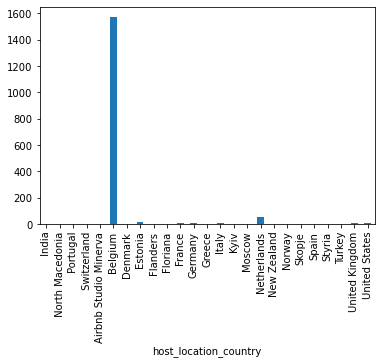

In [25]:
df.groupby('host_location_country').count()['listing_id'].plot(kind='bar')

#### That's not good
- Most of our listings 1573 (92.5%) are from belgium.
- This means this column might not prove to be that useful as we don't have much data for the other countries
- Maybe i should have not dropped the 'host_location_state', 'host_location_city' columns and should have just removed the rows instead. 
- Maybe, you should just try that out!!

----------

More trial and error

In [26]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium


<AxesSubplot:xlabel='room_type'>

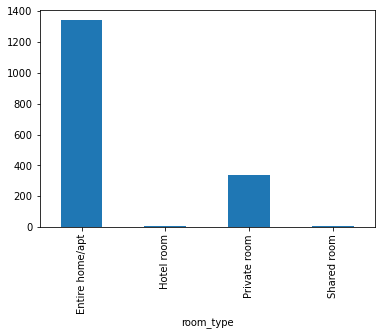

In [27]:
df.groupby('room_type').count()['listing_id'].plot(kind='bar')

The room type does not look to be too distributed, can't think of much to do about this column.

<AxesSubplot:xlabel='property_type'>

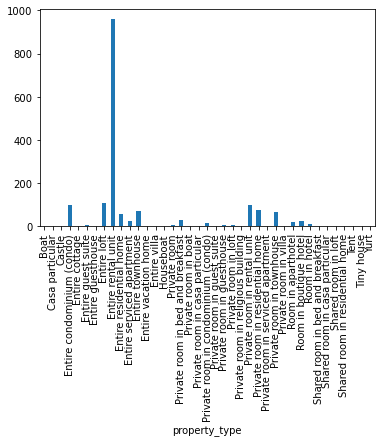

In [28]:
df.groupby('property_type').count()['latitude'].plot(kind='bar')

The property type has too many categorical types for my taste, i would like to reduce this somehow and see if it perfoms better in the model.

In [29]:
df['property_type'].unique()

array(['Room in boutique hotel', 'Entire rental unit',
       'Entire condominium (condo)', 'Private room in residential home',
       'Private room in rental unit', 'Private room in townhouse',
       'Entire residential home', 'Private room in bed and breakfast',
       'Entire loft', 'Entire townhouse', 'Private room in boat',
       'Private room in loft', 'Shared room in residential home',
       'Entire cottage', 'Private room', 'Yurt', 'Entire villa',
       'Houseboat', 'Private room in condominium (condo)', 'Tent',
       'Entire serviced apartment', 'Tiny house', 'Entire guest suite',
       'Private room in guest suite', 'Room in hotel',
       'Private room in villa', 'Private room in guesthouse',
       'Entire guesthouse', 'Room in aparthotel', 'Casa particular',
       'Private room in religious building',
       'Private room in serviced apartment', 'Shared room in loft',
       'Shared room in bed and breakfast',
       'Private room in casa particular',
       'Shared

In [30]:
for i in df['property_type'].unique():
    print(i)

Room in boutique hotel
Entire rental unit
Entire condominium (condo)
Private room in residential home
Private room in rental unit
Private room in townhouse
Entire residential home
Private room in bed and breakfast
Entire loft
Entire townhouse
Private room in boat
Private room in loft
Shared room in residential home
Entire cottage
Private room
Yurt
Entire villa
Houseboat
Private room in condominium (condo)
Tent
Entire serviced apartment
Tiny house
Entire guest suite
Private room in guest suite
Room in hotel
Private room in villa
Private room in guesthouse
Entire guesthouse
Room in aparthotel
Casa particular
Private room in religious building
Private room in serviced apartment
Shared room in loft
Shared room in bed and breakfast
Private room in casa particular
Shared room in casa particular
Boat
Entire vacation home
Castle


I am going to make a dictionary, so that i create a new column based on the room type

In [31]:
pub_priv_dict = {
    'Room in boutique hotel':'Private',
    'Entire rental unit':'Entire',
    'Entire condominium (condo)':'Entire',
    'Private room in residential home':'Private',
    'Private room in rental unit':'Private',
    'Private room in townhouse':'Private',
    'Entire loft':'Entire',
    'Entire residential home':'Entire',
    'Private room in boat':'Private',
    'Private room in bed and breakfast':'Private',
    'Entire townhouse':'Entire',
    'Private room in loft':'Private',
    'Shared room in residential home':'Public',
    'Entire cottage':'Entire',
    'Private room':'Private',
    'Entire villa':'Entire',
    'Yurt':'Private',
    'Houseboat':'Private',
    'Private room in condominium (condo)':'Private',
    'Tent':'Private',
    'Entire serviced apartment':'Entire',
    'Tiny house':'Private',
    'Entire guest suite':'Entire',
    'Private room in guest suite':'Private',
    'Room in hotel':'Private',
    'Private room in guesthouse':'Private',
    'Private room in villa':'Private',
    'Entire guesthouse':'Entire',
    'Room in aparthotel':'Private',
    'Private room in religious building':'Private',
    'Shared room in loft':'Public',
    'Casa particular':'Private',
    'Private room in serviced apartment':'Private',
    'Shared room in bed and breakfast':'Public',
    'Private room in casa particular':'Private',
    'Shared room in casa particular':'Public',
    'Boat':'Private',
    'Entire vacation home':'Entire',
    'Castle':'Private',
}

In [32]:
df['property_type_kind'] = df['property_type'].map(pub_priv_dict)

In [33]:
df

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium,Private
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium,Private
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium,Entire
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium,Entire
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium,Entire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,53913084.0,1.0,417.000000,417.000000,7.000000,28.0,https://www.airbnb.com/rooms/53913084,Fantastic apt in centre Antwerpen - Full SERVICE,51.234800,4.412290,...,433116772.0,Jean-Paul From HUSWELL,2021-11-23,BE,0.0,2720.132353,0.000000,146,Belgium,Entire
1695,53913552.0,1.0,50.000000,50.000000,1.000000,365.0,https://www.airbnb.com/rooms/53913552,Fantastische loft om in te vertoeven met parking,51.218570,4.435350,...,164785425.0,Yassin,2017-12-29,"Kontich, Flanders, Belgium",0.0,2720.132353,0.000000,1571,Belgium,Entire
1696,53916524.0,1.0,88.000000,88.000000,3.000000,365.0,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,51.231330,4.403520,...,46300712.0,Michael,2015-10-11,"Antwerp, Flanders, Belgium",0.0,2720.132353,0.000000,2381,Belgium,Entire
1697,53949105.0,1.0,990.000000,990.000000,2.000000,1125.0,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,51.212320,4.482230,...,377595714.0,Kelly,2020-11-30,BE,0.0,2720.132353,0.000000,504,Belgium,Private


Let's see how my new column is doing

<AxesSubplot:>

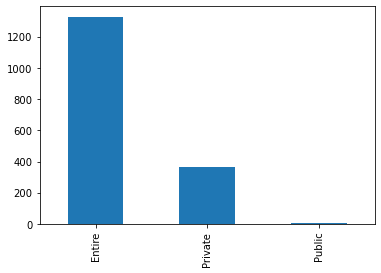

In [34]:
df['property_type_kind'].value_counts().plot(kind='bar')

Mostly, our data consists of properties listed as 'Entire' and that would make sense as our data is from AirBnB

-----------

<AxesSubplot:>

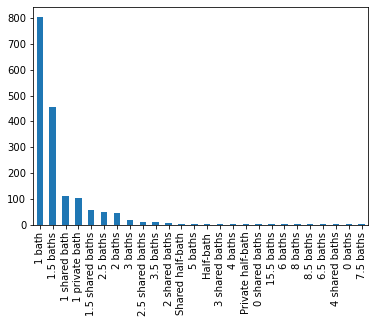

In [35]:
df['bathrooms_text'].value_counts().plot(kind='bar')

This variable can be seperated as 1 for number of bathrooms and other for if it is public or shared

In [36]:
df['bathrooms_text'].value_counts()

1 bath               803
1.5 baths            457
1 shared bath        112
1 private bath       103
1.5 shared baths      55
2.5 baths             50
2 baths               45
3 baths               17
2.5 shared baths      10
3.5 baths             10
2 shared baths         7
Shared half-bath       4
5 baths                4
Half-bath              4
3 shared baths         3
4 baths                3
Private half-bath      2
0 shared baths         2
15.5 baths             1
6 baths                1
8 baths                1
8.5 baths              1
6.5 baths              1
4 shared baths         1
0 baths                1
7.5 baths              1
Name: bathrooms_text, dtype: int64

In [37]:
for i in df['bathrooms_text'].unique():
    print(i)

1 private bath
1.5 baths
2.5 baths
1 bath
2 shared baths
3 shared baths
Shared half-bath
1.5 shared baths
2 baths
1 shared bath
3.5 baths
3 baths
2.5 shared baths
8.5 baths
0 baths
5 baths
Half-bath
Private half-bath
4 shared baths
4 baths
0 shared baths
6.5 baths
15.5 baths
8 baths
6 baths
7.5 baths


Again, creating a dictionary so that i can make new columns that i think will be helpful

In [38]:
type_of_bath = {
'1 private bath': 'Private',
'2.5 baths': 'Private',
'1 bath': 'Private',
'2 shared baths': 'Public',
'1.5 baths': 'Private',
'Shared half-bath': 'Public',
'1.5 shared baths': 'Public',
'2 baths': 'Private',
'3 shared baths': 'Public',
'3 baths': 'Private',
'1 shared bath': 'Public',
'2.5 shared baths': 'Public',
'3.5 baths': 'Private',
'8.5 baths': 'Private',
'0 baths': 'Private',
'Half-bath': 'Private',
'Private half-bath': 'Private',
'5 baths': 'Private',
'4 shared baths': 'Public',
'0 shared baths': 'Public',
'4 baths': 'Private',
'6.5 baths': 'Private',
'15.5 baths': 'Private',
'8 baths': 'Private',
'6 baths': 'Private',
'7.5 baths': 'Private'
}

In [39]:
no_of_bath = {
'1 private bath': 1,
'2.5 baths': 2.5,
'1 bath': 1,
'2 shared baths': 2,
'1.5 baths': 1.5,
'Shared half-bath': 0.5,
'1.5 shared baths': 1.5,
'2 baths': 2,
'3 shared baths': 3,
'3 baths': 3,
'1 shared bath': 1,
'2.5 shared baths': 2.5,
'3.5 baths': 3.5,
'8.5 baths': 8.5,
'0 baths': 0,
'Half-bath': 0.5,
'Private half-bath': 0.5,
'5 baths': 5,
'4 shared baths': 4,
'0 shared baths': 0,
'4 baths': 4,
'6.5 baths': 6.5,
'15.5 baths': 15.5,
'8 baths': 8,
'6 baths': 6,
'7.5 baths': 7.5
}

In [40]:
df['no_of_bath'] = df['bathrooms_text'].map(no_of_bath)

In [41]:
df['type_of_bath'] = df['bathrooms_text'].map(type_of_bath)

In [42]:
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind,no_of_bath,type_of_bath
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium,Private,1.0,Private
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium,Private,1.0,Private
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium,Entire,1.5,Private
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium,Entire,1.5,Private
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium,Entire,2.5,Private


Let's observe these 2 new variables we created

<AxesSubplot:>

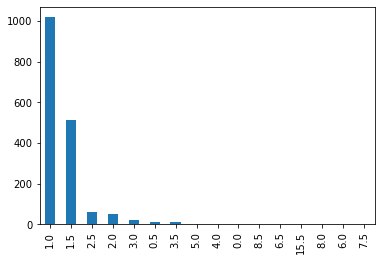

In [43]:
df['no_of_bath'].value_counts().plot(kind='bar')

Most of listings have a single bathroom, which is to be expected. Nothing surprising here

<AxesSubplot:>

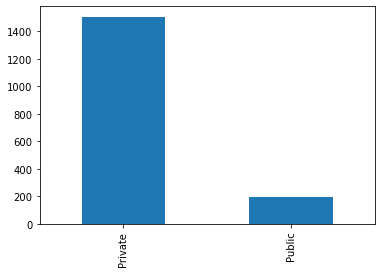

In [44]:
df['type_of_bath'].value_counts().plot(kind='bar')

Most of listings have a private bathroom, which again is to be expected.

For anyone wondering, why are we inspecting every variable
- It is because we are looking if we can find a 'anomaly' or something useful that can help us model better. 
- If something is behaving as expected, we don't have to really do feature engineering or change things.

-----------------

Let's look at the amenities column
- Here i can think of a couple of things right off the bat
- This data is valuable but cannot be modelled in it's current form
- So we need to transform it somehow
- We can take a count of the amenities as a feature, that is a pretty straightforward way
- Or, if we want to take a more complex route, we make a column for every amenitiy and then put 1 if the amenitiy is there in the listing and 0 if the amenitiy is not there in the listing. Basically dummy encode it.

I am going to go for the 1st approach (count of amenities)
- if you feel like it, go for the 2nd approach 
- By all means, come up with a 3rd approach. Even better !!

In [45]:
df['amenities']

0       ["Kitchen", "Smoke alarm", "Hair dryer", "Keyp...
1       ["Refrigerator", "Kitchen", "Smoke alarm", "Ha...
2       ["Refrigerator", "Kitchen", "Smoke alarm", "Ha...
3       ["Refrigerator", "Kitchen", "Smoke alarm", "Ha...
4       ["Refrigerator", "Elevator", "Paid street park...
                              ...                        
1694    ["Refrigerator", "Kitchen", "Smoke alarm", "Sh...
1695    ["Long term stays allowed", "Kitchen", "Smoke ...
1696    ["Refrigerator", "Elevator", "Yamaha RX-A550 s...
1697    ["Refrigerator", "Private garden or backyard",...
1698    ["Kitchen", "Voice command Google  Bluetooth s...
Name: amenities, Length: 1699, dtype: object

In [46]:
import ast
x = ast.literal_eval(df['amenities'][0])
x

['Kitchen',
 'Smoke alarm',
 'Hair dryer',
 'Keypad',
 'Carbon monoxide alarm',
 'Mini fridge',
 'Wifi',
 'Dishes and silverware',
 'Security cameras on property',
 'Clothing storage',
 'Luggage dropoff allowed',
 'Bed linens',
 'Iron',
 'Dedicated workspace',
 'Microwave',
 'Molton Brown body soap',
 'Essentials',
 'Hot water kettle',
 'Long term stays allowed',
 'Portable fans',
 'Wine glasses',
 'Heating',
 'Paid parking off premises',
 'Hot water',
 'Fire extinguisher',
 'Bluetooth sound system',
 'Coffee maker',
 'Molton Brown shampoo',
 'Safe',
 'Hangers',
 'Cable TV',
 'TV with standard cable',
 'Shower gel']

In [47]:
def check_number_amneties(x):
    list_of_amnities = ast.literal_eval(x)
    no_of_amnities = len(list_of_amnities)
    return no_of_amnities

In [48]:
df['amenities'].apply(check_number_amneties)

0       33
1       31
2       46
3       44
4       45
        ..
1694    30
1695     8
1696    37
1697    29
1698    35
Name: amenities, Length: 1699, dtype: int64

In [49]:
df['number_of_amneties'] = df['amenities'].apply(check_number_amneties)

Let's look at the new column we just created

<AxesSubplot:xlabel='number_of_amneties', ylabel='Density'>

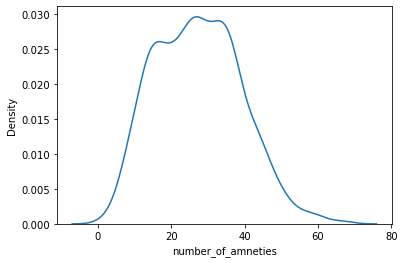

In [50]:
sns.kdeplot(df['number_of_amneties'])

------------------

## Checking relationships between variables

In [51]:
pd.options.display.max_columns = None
df.head()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind,no_of_bath,type_of_bath,number_of_amneties
0,50904.0,0.0,166.666667,158.666667,1.000000,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,1358.500000,255.500000,4234,Belgium,Private,1.0,Private,33
1,891884.0,0.0,175.000000,175.000000,1.666667,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,Room in boutique hotel,Hotel room,2.0,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0,619.000000,127.000000,4234,Belgium,Private,1.0,Private,31
2,891907.0,1.0,215.000000,215.000000,3.000000,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0,1694.500000,300.166667,4234,Belgium,Entire,1.5,Private,46
3,2543695.0,1.0,200.000000,200.000000,2.000000,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,Entire rental unit,Entire home/apt,4.0,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077.0,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0,1603.866667,362.866667,4234,Belgium,Entire,1.5,Private,44
4,116134.0,1.0,150.000000,150.000000,2.000000,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,Entire rental unit,Entire home/apt,4.0,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942.0,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0,1540.908333,265.266667,3992,Belgium,Entire,2.5,Private,45


In [52]:
df.columns

Index(['listing_id', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights', 'listing_url', 'name', 'latitude', 'longitude',
       'property_type', 'room_type', 'accomodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'host_id', 'host_name', 'host_since',
       'host_location', 'total_reviews', 'days_since_review', 'comment_length',
       'days_since_joined', 'host_location_country', 'property_type_kind',
       'no_of_bath', 'type_of_bath', 'number_of_amneties'],
      dtype='object')

Let's first remove the columns which were helpful to use while joining the tables, but are hardly of any use now.

In [53]:
df.drop(['listing_id','listing_url','name','latitude',
         'longitude','property_type','bathrooms_text',
         'amenities','host_id', 'host_name','host_since',
        'host_location','adjusted_price'], axis=1, inplace=True)

### Now let me give the reasoning for dropping the columns that i did
- listing_id - Is a unique identifier of an listing, great for EDA but can't be used to predict for new listings
- listing_url - By all means, want to try out some NLP, go for it !!
- name - Same reason as above, NLP
- latitude & longitude - This is an interesting choice, here i believe some feature engineering could have been done. 
 - We could have clustered the locations together. Eg.(cluster1,cluster2,cluster3)
 - We could even have found the city center(centroid) and then calculated the distance for each listing from that center, almost like how far away is the listing from the city. 
 - If you want to try out these ideas, now is the time !!
- property_type - The reason i dropped this is because i have already created a new feature out of this variable, now one could argue that keep both and see what happens, here i have not done that, feel free to experiment.
- bathrooms_text - Same reason as above, already had created features from that column
- amenities - Same as above
- host_id - Was useful to join the tables, will not be useful to model
- host_name - NLP magic needed, as your cohort has not undergone that part of study so this was also dropped.
- host_since - Created a much more meaningful feature name 'days_since_joined'. So this one is no longer needed
- host_location - Created a new column named country. So letting this one go
- adjusted_price - This is mostly a duplicate of the price variable. You don't know the adjusted price till you the price!!!

In [54]:
df.head()

,available,price,minimum_nights,maximum_nights,room_type,accomodates,bedrooms,beds,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind,no_of_bath,type_of_bath,number_of_amneties
0,0.0,166.666667,1.000000,60.0,Hotel room,2.0,1.0,1.0,2.0,1358.500000,255.500000,4234,Belgium,Private,1.0,Private,33
1,0.0,175.000000,1.666667,1125.0,Hotel room,2.0,1.0,1.0,2.0,619.000000,127.000000,4234,Belgium,Private,1.0,Private,31
2,1.0,215.000000,3.000000,1125.0,Entire home/apt,4.0,2.0,2.0,6.0,1694.500000,300.166667,4234,Belgium,Entire,1.5,Private,46
3,1.0,200.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,15.0,1603.866667,362.866667,4234,Belgium,Entire,1.5,Private,44
4,1.0,150.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,120.0,1540.908333,265.266667,3992,Belgium,Entire,2.5,Private,45


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   available              1699 non-null   float64
 1   price                  1699 non-null   float64
 2   minimum_nights         1699 non-null   float64
 3   maximum_nights         1699 non-null   float64
 4   room_type              1699 non-null   object 
 5   accomodates            1699 non-null   float64
 6   bedrooms               1699 non-null   float64
 7   beds                   1699 non-null   float64
 8   total_reviews          1699 non-null   float64
 9   days_since_review      1699 non-null   float64
 10  comment_length         1699 non-null   float64
 11  days_since_joined      1699 non-null   int64  
 12  host_location_country  1699 non-null   object 
 13  property_type_kind     1699 non-null   object 
 14  no_of_bath             1699 non-null   float64
 15  type

## Turning columns to categorical 

In [56]:
df.available.astype('category')
df.room_type.astype('category')
df.host_location_country.astype('category')
df.property_type_kind.astype('category')
df.type_of_bath.astype('category')
df.accomodates.astype('category')
df.bedrooms.astype('category')
df.beds.astype('category')
df.no_of_bath.astype('category')

/home/infinity/anaconda3/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0       1.0
1       1.0
2       1.5
3       1.5
4       2.5
       ... 
1694    1.0
1695    1.0
1696    1.5
1697    7.5
1698    1.5
Name: no_of_bath, Length: 1699, dtype: category
Categories (16, float64): [0.0, 0.5, 1.0, 1.5, ..., 7.5, 8.0, 8.5, 15.5]

So here i have taken some iteresting decisions.
- I have decided to make columns as 'category', where they could have been numerical, what do i mean by that.
- accomodates, bedrooms, beds, no_of_bath - are the variables that are ordinal in nature, meaning even if we went with a numerical rather than a category, it would be okay.
- You have to think what tradeoff's you are making here, whenever we introduce a column as a category, we make the data sparse for that encoding of the row.
- Here i have decided to do it this way, if you would rather do it in some other fashion, Go for it !!

In [57]:
df.head()

,available,price,minimum_nights,maximum_nights,room_type,accomodates,bedrooms,beds,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind,no_of_bath,type_of_bath,number_of_amneties
0,0.0,166.666667,1.000000,60.0,Hotel room,2.0,1.0,1.0,2.0,1358.500000,255.500000,4234,Belgium,Private,1.0,Private,33
1,0.0,175.000000,1.666667,1125.0,Hotel room,2.0,1.0,1.0,2.0,619.000000,127.000000,4234,Belgium,Private,1.0,Private,31
2,1.0,215.000000,3.000000,1125.0,Entire home/apt,4.0,2.0,2.0,6.0,1694.500000,300.166667,4234,Belgium,Entire,1.5,Private,46
3,1.0,200.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,15.0,1603.866667,362.866667,4234,Belgium,Entire,1.5,Private,44
4,1.0,150.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,120.0,1540.908333,265.266667,3992,Belgium,Entire,2.5,Private,45


Let's look at the relations between the numerical columns

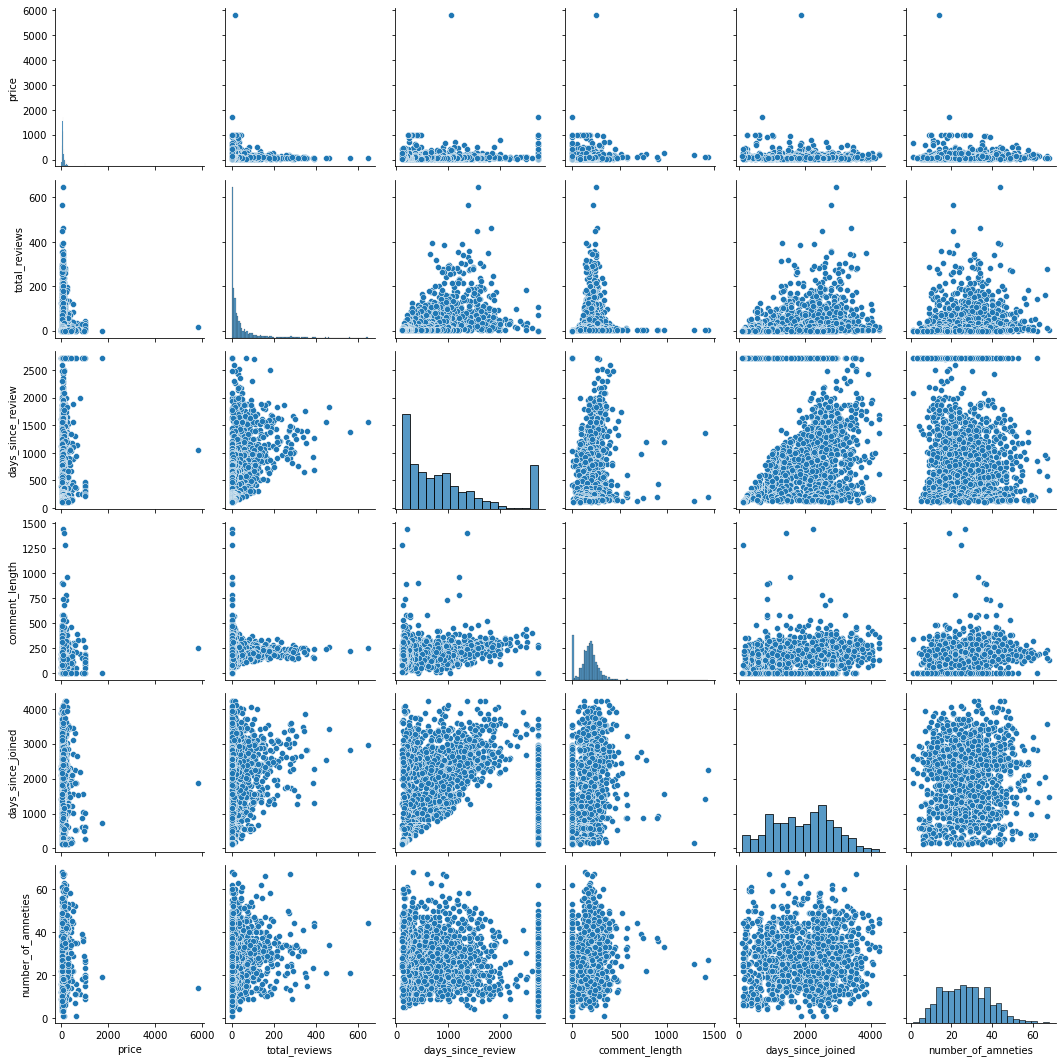

In [58]:
sns.pairplot(df[['price','total_reviews','days_since_review','comment_length','days_since_joined','number_of_amneties']])

Observations 
- price - Nothing major that i can see
- total_reviews -
 - Has decent correlation with days since review, 
 - and positive relation with days_since_joined, which makes sense, the earlier you joined the more review you are likely to have.
- days_since_review
 - Has a positive correlation with days_since_joined, what that means is that earlier they joined, the more days has it been since their last review, This is importantly telling
 - What this means is that the old folks are not getting most reviews, which would indicate that new commers are getting more share of the new reviews.
 - This would also indicate that there is no monopoly here, where the old listings are getting most crowd, but rather it is the new listings which are getting more attention. 
 - Can be investigated more by binning the days_since_joined columne and checking count. Maybe you should try it ?
- comment_length - 
 - Does not gets impacted by the total reviews
 - Not much else, i am starting to have doubts if this feature we created will be useful, let's see. If it doesn't work out we will just remove it.
- days_since_joined - The earlier you joined, the more reviews you have.
- number_of_amneties - Positive correlation with total_reviews. More amneties - More reviews 

In [59]:
df.head()

,available,price,minimum_nights,maximum_nights,room_type,accomodates,bedrooms,beds,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind,no_of_bath,type_of_bath,number_of_amneties
0,0.0,166.666667,1.000000,60.0,Hotel room,2.0,1.0,1.0,2.0,1358.500000,255.500000,4234,Belgium,Private,1.0,Private,33
1,0.0,175.000000,1.666667,1125.0,Hotel room,2.0,1.0,1.0,2.0,619.000000,127.000000,4234,Belgium,Private,1.0,Private,31
2,1.0,215.000000,3.000000,1125.0,Entire home/apt,4.0,2.0,2.0,6.0,1694.500000,300.166667,4234,Belgium,Entire,1.5,Private,46
3,1.0,200.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,15.0,1603.866667,362.866667,4234,Belgium,Entire,1.5,Private,44
4,1.0,150.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,120.0,1540.908333,265.266667,3992,Belgium,Entire,2.5,Private,45


<AxesSubplot:xlabel='host_location_country'>

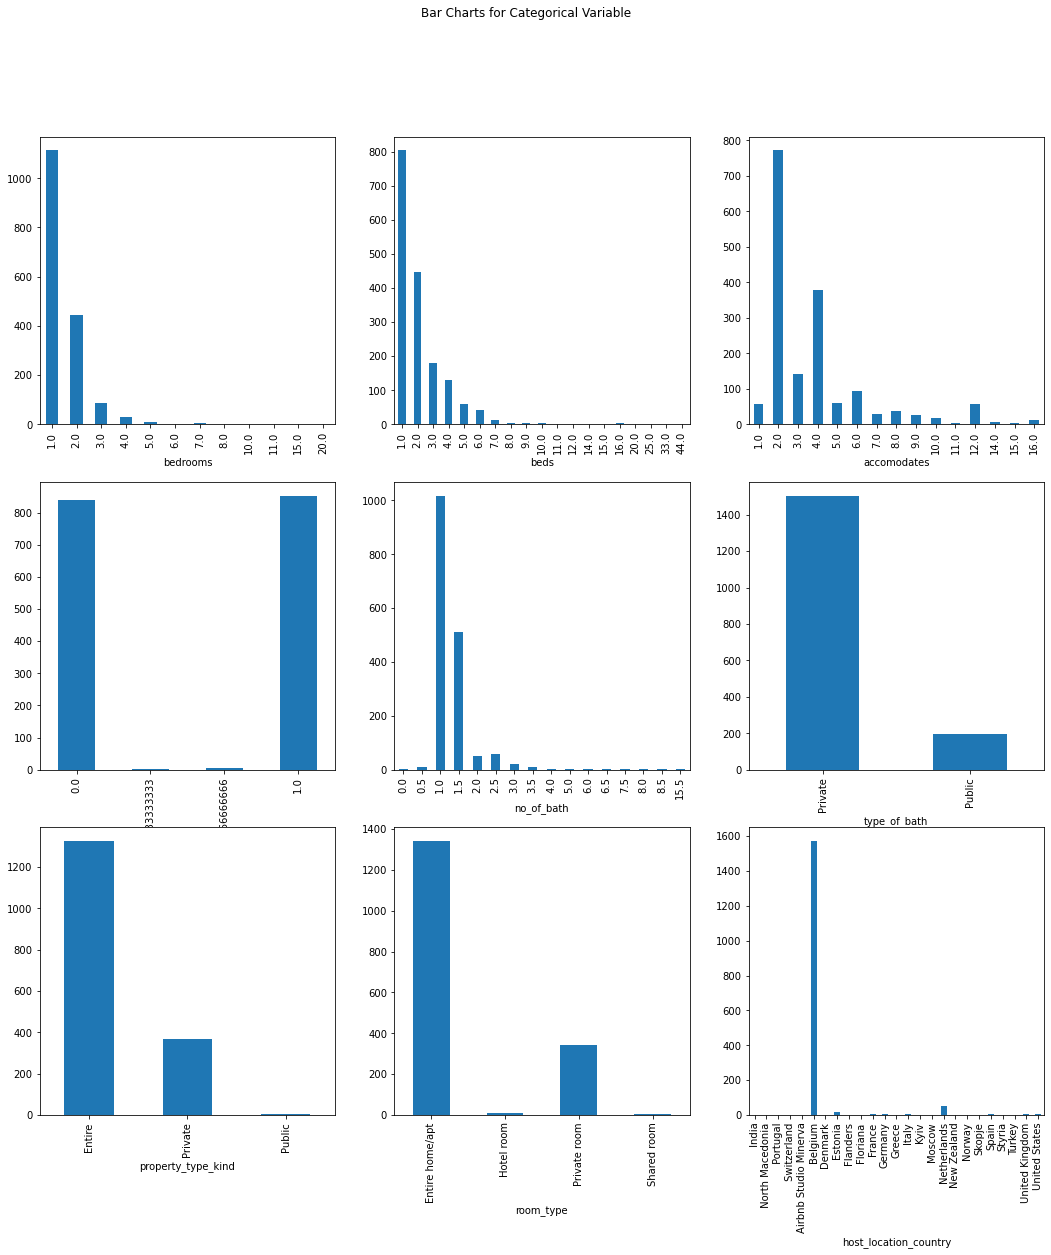

In [60]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
 
fig.suptitle('Bar Charts for Categorical Variable')


df.groupby('bedrooms').count()['price'].plot(kind='bar',ax=axes[0, 0])
df.groupby('beds').count()['price'].plot(kind='bar',ax=axes[0, 1])
df.groupby('accomodates').count()['price'].plot(kind='bar',ax=axes[0, 2])


df.groupby('available').count()['price'].plot(kind='bar',ax=axes[1, 0])
df.groupby('no_of_bath').count()['price'].plot(kind='bar',ax=axes[1, 1])
df.groupby('type_of_bath').count()['price'].plot(kind='bar',ax=axes[1, 2])


df.groupby('property_type_kind').count()['price'].plot(kind='bar',ax=axes[2, 0])
df.groupby('room_type').count()['price'].plot(kind='bar',ax=axes[2, 1])
df.groupby('host_location_country').count()['price'].plot(kind='bar',ax=axes[2, 2])



Observations
- I am not going to write much here, as these are really easy to spot

In [61]:
df.head()

,available,price,minimum_nights,maximum_nights,room_type,accomodates,bedrooms,beds,total_reviews,days_since_review,comment_length,days_since_joined,host_location_country,property_type_kind,no_of_bath,type_of_bath,number_of_amneties
0,0.0,166.666667,1.000000,60.0,Hotel room,2.0,1.0,1.0,2.0,1358.500000,255.500000,4234,Belgium,Private,1.0,Private,33
1,0.0,175.000000,1.666667,1125.0,Hotel room,2.0,1.0,1.0,2.0,619.000000,127.000000,4234,Belgium,Private,1.0,Private,31
2,1.0,215.000000,3.000000,1125.0,Entire home/apt,4.0,2.0,2.0,6.0,1694.500000,300.166667,4234,Belgium,Entire,1.5,Private,46
3,1.0,200.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,15.0,1603.866667,362.866667,4234,Belgium,Entire,1.5,Private,44
4,1.0,150.000000,2.000000,1125.0,Entire home/apt,4.0,2.0,2.0,120.0,1540.908333,265.266667,3992,Belgium,Entire,2.5,Private,45


In [62]:
df.shape

(1699, 17)

This Finally is our dataset, this is what we will train our models on.

In [63]:
df.to_csv('train_cleaned_combined_airbnb.csv')